# 1. Package Loading

In [1]:
#Basic
import pandas as pd
import numpy as np 
import random   
import os
import time
from datetime import timedelta
import pickle

In [2]:

#ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

   

In [3]:
#Visualization               
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Loading

In [4]:
data_dir = '/Users/chiyunchen/pythonProject/ML_hw1/data'
!ls '/Users/chiyunchen/pythonProject/ML_hw1/data'

data_mnist.csv data_mnist.zip test_mnist.csv test_mnist.zip


In [5]:
start_time = time.time()
data = pd.read_csv(data_dir+'/data_mnist.csv')
test = pd.read_csv(data_dir+'/test_mnist.csv')
print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:01.638594 time elapsed ---


Check out the look of data

In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data Structure
- 28 x 28 = 784 pixel
- pixel-value 0-255
- x = i * 28 + j,  i and j are integers between 0 and 27
- row i and column j 
- For example,  pixel31 = 4th col, 2nd row

In [8]:
#Convert the dataframe to a numpy array (matrix)
start_time = time.time()
mnist = np.array(data)
mnist_prediction= np.array(test)
X, y= mnist[:,1:], mnist[:,0]
print("X Data Shape is ", X.shape)
print("y Data Shape is ", y.shape)
print("The Data Shape for Prediction is ",mnist_prediction.shape)
print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

X Data Shape is  (42000, 784)
y Data Shape is  (42000,)
The Data Shape for Prediction is  (10000, 784)
--- 0:00:00.153510 time elapsed ---


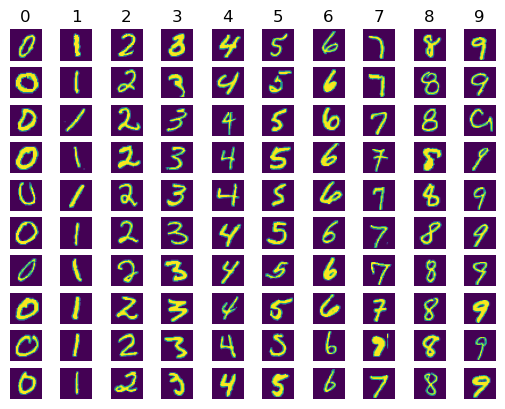

--- 0:00:01.594399 time elapsed ---


In [40]:
#Visualize the pixels data
start_time = time.time()
categories = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
num_cat = len(categories)
samples = 10
for element, cat in enumerate(categories):
    idxs = np.nonzero([i == element for i in y])
    idxs = np.random.choice(idxs[0], samples, replace=False)
    for i , idx in enumerate(idxs):
        plt_idx = i * num_cat + element + 1
        plt.subplot(samples, num_cat, plt_idx)
        plt.imshow(X[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cat)
        

plt.show()
print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

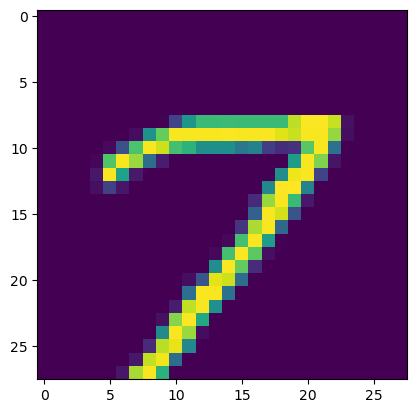

--- 0:00:00.088004 time elapsed ---


In [45]:
# Just to visualize one test image
start_time = time.time()
plt.imshow(mnist_prediction[6666].reshape((28, 28)))
plt.show()
print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

# 3. Model Training - Testing

## 3.0 Normalization

## 3.1 Pre-traning

Spilt the data into training and testing part.
Testing part still from mnist data but for evaluate the model

In [11]:
start_time = time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)
print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:00.282747 time elapsed ---


## 3.2 Model Training

In [12]:
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=4,weights="distance")
knn.fit(X_train, y_train)
print("--- %s time elapsed ---" % str(timedelta(seconds=time.time() - start_time)))

--- 0:00:00.006426 time elapsed ---


## 3.3 Model Evaluation

In [13]:
start_time = time.time()
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.968


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1033
           1       0.96      1.00      0.98      1171
           2       0.99      0.96      0.97      1044
           3       0.96      0.96      0.96      1088
           4       0.98      0.97      0.97      1018
           5       0.95      0.96      0.96       949
           6       0.98      0.99      0.99      1034
           7       0.97      0.97      0.97      1100
           8       0.99      0.92      0.95      1016
           9       0.94      0.96      0.95      1047

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



## 3.4 Model Saving

In [17]:
pickle.dump(knn, open("knn_4_model.pkl", "wb"))

## 3.5 Model Loading

In [18]:
loaded_model = pickle.load(open("knn_4_model.pkl", 'rb'))

# 4. Model Training - Finding the Best

In [36]:
error = []

# Calculating error for K values between 1 and 12
for i in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 12), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# 5. Prediction

In [28]:
results = loaded_model.predict(mnist_prediction)

# 6. Submission

In [32]:
sub = pd.DataFrame({'ImageId':np.arange(10000),'Label':results.squeeze().astype(np.int)})
sub["ImageId"]=sub["ImageId"]+1
sub.head()

,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4


In [34]:
sub.to_csv('hw01_submission.csv', index=False)

In [ ]:
models = []
models.append(('KNN_3', KNeighborsClassifier(n_neighbors=3,weights="distance")))
models.append(('KNN_4', KNeighborsClassifier(n_neighbors=4,weights="distance")))
models.append(('KNN_8', KNeighborsClassifier(n_neighbors=4,weights="distance")))
models.append(('KNN_10', KNeighborsClassifier(n_neighbors=10,weights="distance")))

In [28]:
def KNN(X_train_, X_test_, y_train_, y_test_):
    parameters = {'n_neighbors':[4, 8, 10]}

    neigh = KNeighborsClassifier()

    clf = GridSearchCV(neigh, parameters)clf, param_grid, cv=cv, scoring='accuracy', verbose=10

    clf.fit(X_train_, y_train_)
    
    y_pred = clf.best_estimator_.predict(X_test_)
    le = preprocessing.LabelEncoder()
    y_test_encoded = le.fit_transform(y_test_)
    y_pred_encoded = le.transform(y_pred)
    clf_accuracy_score = accuracy_score(y_test_encoded, y_pred_encoded)
    clf_precision_score = precision_score(y_test_encoded, y_pred_encoded)
    clf_recall_score = recall_score(y_test_encoded, y_pred_encoded)
    return clf, clf_accuracy_score, clf_precision_score, clf_recall_score

In [24]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
scaler = StandardScaler()
scaler.fit(X)
sc_X = scaler.transform(X)

In [21]:
print(sc_X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
sc_X = StandardScaler()

In [ ]:
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
knn.score(X_test,y_test)